In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px

file_path = '/Users/RobertHolzmann/Downloads/Blogpost/Datasets/US_contracts.csv'


df = pd.read_csv(file_path)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 4 to 0
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   This Year's Rank                    5 non-null      int64  
 1   Company                             5 non-null      object 
 2   Country                             5 non-null      object 
 3   2022 Defense Revenue (in billions)  5 non-null      float64
 4   2022 US Contracts (in billions)     5 non-null      float64
 5   2021 Defense Revenue (in billions)  5 non-null      float64
 6   Revenue From Defense                5 non-null      float64
dtypes: float64(4), int64(1), object(2)
memory usage: 320.0+ bytes


In [28]:

# Convert the relevant columns to numeric values
df['2022 Defense Revenue (in billions)'] = df['2022 Defense Revenue (in billions)'].replace('[\$,]', '', regex=True).astype(float)
df['2022 US Contracts (in billions)'] = df['2022 US Contracts (in billions)'].replace('[\$,]', '', regex=True).astype(float)
df['2021 Defense Revenue (in billions)'] = df['2021 Defense Revenue (in billions)'].replace('[\$,]', '', regex=True).astype(float)
df['Revenue From Defense'] = df['Revenue From Defense'].replace('%', '', regex=True).astype(float) / 100
df['US Contracts Percentage'] = (df['2022 US Contracts (in billions)'] / df['2022 Defense Revenue (in billions)']) * 100


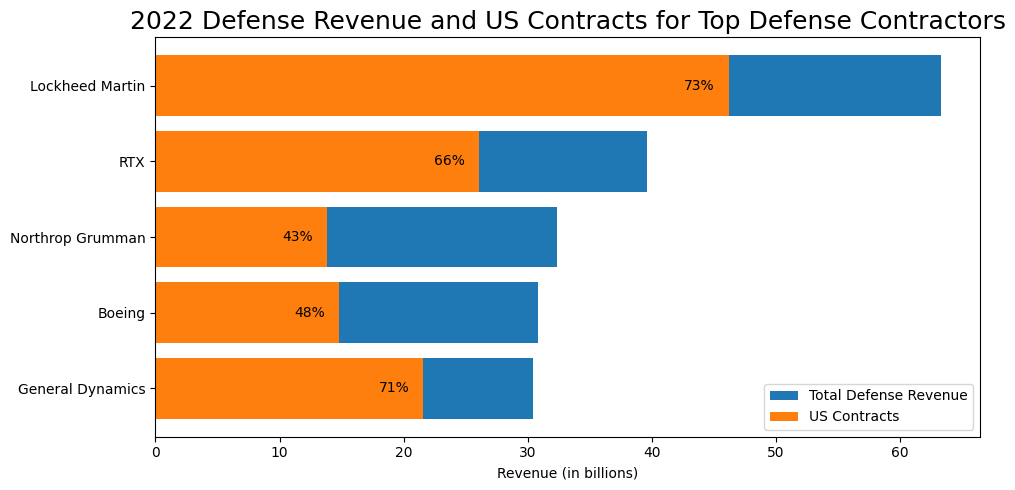

In [61]:

# Sort the DataFrame by the 'Company' column in reverse order
df = df.sort_values('2022 Defense Revenue (in billions)', ascending=True)

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 5))

# Plotting the total defense revenue
total = ax.barh(df['Company'], df['2022 Defense Revenue (in billions)'], label='Total Defense Revenue')

# Plotting the US contracts portion
us_contracts = ax.barh(df['Company'], df['2022 US Contracts (in billions)'], label='US Contracts')

font = {'family': 'sans-serif',
        'weight': 'normal',
        'size': 18
       }

# Adding labels and title
ax.set_title('2022 Defense Revenue and US Contracts for Top Defense Contractors', fontdict=font)
ax.set_xlabel('Revenue (in billions)', fontsize = 10)
ax.set_ylabel('')
ax.legend()

for bar, percentage in zip(us_contracts, df['US Contracts Percentage']):
    width = bar.get_width()
    ax.annotate(f'{percentage:.0f}%',
                xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(-10, 0),  # 10 points horizontal offset
                textcoords="offset points",
                ha='right', va='center'
                )

# Display the plot
plt.tight_layout()
plt.show()
